# Machine Learning 2023/2024

## Third Home Assignment

**Group Number:** 10

**Group Elements:**
- André Santos (fc53323)
- Filipe Santos (fc53304)
- João Martins (fc62532)
- Rúben Torres (fc62531)

**Hours Worked:**
- André Santos (10h)
- Filipe Santos (10h)
- João Martins (10h)
- Rúben Torres (10h)

#### Imports 

In [65]:
import pandas as pd
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import (
    RandomForestRegressor, 
    BaggingRegressor, 
    AdaBoostRegressor, 
    GradientBoostingRegressor
)
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import (
    explained_variance_score,  
    mean_squared_error, 
    max_error, 
    mean_absolute_error, 
)
from scipy.stats import pearsonr
from sklearn.preprocessing import ( 
    StandardScaler, 
    PowerTransformer,  
    QuantileTransformer, 
    Normalizer,
) 
from sklearn.decomposition import (
    PCA, 
    KernelPCA, 
)
from sklearn.svm import SVR
from sklearn.model_selection import KFold, GridSearchCV, LeaveOneOut 
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel


In [66]:
def printAvalStat(truth, preds):
    print(" The RVE is: ", explained_variance_score(truth, preds))
    print(" The rmse is: ", mean_squared_error(truth, preds, squared=False))
    corr, pval=pearsonr(truth, preds)
    print(" The Correlation Score is: %6.4f (p-value=%e)\n"%(corr,pval))

    print(" The Maximum Error is: ", max_error(truth, preds))
    print(" The Mean Absolute Error is:", mean_absolute_error(truth, preds),"\n")

def nfold_valid_RVE_RMSE(X_train_Valids, y_train, mdl):
    kf = KFold(n_splits=5, shuffle=True, random_state=23)
    kf.get_n_splits(X_train_Valids)
    TRUTH_nfold=None
    PREDS_nfold=None
    for train_index, test_index in kf.split(X_train_Valids):
        X_train_nfold, X_ivs_nfold = X_train_Valids[train_index], X_train_Valids[test_index]
        y_train_nfold, y_ivs_nfold = y_train[train_index], y_train[test_index]

        mdl.fit(X_train_nfold, y_train_nfold)
        preds = mdl.predict(X_ivs_nfold)
        if TRUTH_nfold is None:
            PREDS_nfold=preds
            TRUTH_nfold=y_ivs_nfold
        else:
            PREDS_nfold=np.hstack((PREDS_nfold, preds))
            TRUTH_nfold=np.hstack((TRUTH_nfold, y_ivs_nfold))
        
    return explained_variance_score(TRUTH_nfold, PREDS_nfold),mean_squared_error(TRUTH_nfold, PREDS_nfold, squared=False)

In [67]:
def nfold_valid(X_train_Valids, y_train, mdl):
    kf = KFold(n_splits=5, shuffle=True, random_state=23)
    kf.get_n_splits(X_train_Valids)
    TRUTH_nfold=None
    PREDS_nfold=None
    for train_index, test_index in kf.split(X_train_Valids):
        X_train_nfold, X_ivs_nfold = X_train_Valids[train_index], X_train_Valids[test_index]
        y_train_nfold, y_ivs_nfold = y_train[train_index], y_train[test_index]

        mdl.fit(X_train_nfold, y_train_nfold)
        preds = mdl.predict(X_ivs_nfold)
        if TRUTH_nfold is None:
            PREDS_nfold=preds
            TRUTH_nfold=y_ivs_nfold
        else:
            PREDS_nfold=np.hstack((PREDS_nfold, preds))
            TRUTH_nfold=np.hstack((TRUTH_nfold, y_ivs_nfold))
        
    printAvalStat(TRUTH_nfold, PREDS_nfold)

### Loading and understanding the Dataset

In [68]:
X_train, X_ivs, y_train, col_names = pickle.load(open("drd2_data.pickle", "rb"))
print(X_train.shape)

(7337, 2132)


In [69]:
print(X_ivs.shape)

(816, 2132)


In [70]:
print(y_train.shape)

(7337,)


In [71]:
N,M=X_train.shape
v=np.hstack((y_train.reshape((N,1)), X_train))
pd.DataFrame(v)

,0,1,2,3,4,5,6,7,8,9,...,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132
0,0.654947,541.280138,541.656,10.0,1.0,8.0,1.0,10.0,40.0,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.649995,426.197714,426.582,5.0,1.0,9.0,1.0,4.0,30.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.154947,348.183778,348.446,4.0,0.0,3.0,0.0,3.0,26.0,50.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.616176,1455.763803,1456.831,27.0,19.0,23.0,17.0,16.0,105.0,206.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.359725,387.151368,387.886,4.0,0.0,4.0,0.0,4.0,27.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332,0.000000,467.149047,467.513,6.0,0.0,6.0,0.0,5.0,32.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7333,0.002193,240.162649,240.350,2.0,0.0,3.0,0.0,2.0,18.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7334,0.293481,510.317874,510.802,4.0,0.0,10.0,0.0,4.0,37.0,79.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7335,0.596804,393.187483,393.556,4.0,2.0,5.0,1.0,5.0,28.0,55.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
pd.DataFrame(np.corrcoef(v.T))

,0,1,2,3,4,5,6,7,8,9,...,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132
0,1.000000,0.160182,0.160216,0.130117,0.084939,0.151968,0.095929,0.126690,0.157545,0.165189,...,0.011360,0.095138,0.078900,-0.021728,-0.012977,0.001865,0.012468,0.031884,-0.027774,0.058370
1,0.160182,1.000000,0.999998,0.919389,0.772557,0.888252,0.784495,0.856242,0.992766,0.973177,...,0.213406,0.019559,0.127229,0.117371,-0.017119,0.053576,0.212881,0.342831,0.173077,0.219727
2,0.160216,0.999998,1.000000,0.919128,0.772379,0.888072,0.784320,0.855980,0.992623,0.972956,...,0.213435,0.019583,0.127309,0.117351,-0.017201,0.053498,0.212889,0.342785,0.173016,0.219646
3,0.130117,0.919389,0.919128,1.000000,0.838103,0.863232,0.843652,0.931528,0.922469,0.905146,...,0.196534,-0.008557,0.095891,0.064926,-0.026235,0.043314,0.181134,0.332638,0.137266,0.205303
4,0.084939,0.772557,0.772379,0.838103,1.000000,0.704868,0.993448,0.653117,0.774714,0.769215,...,0.185163,-0.032325,0.083849,0.022735,-0.013150,0.045537,0.110449,0.409722,0.210139,0.231743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,0.001865,0.053576,0.053498,0.043314,0.045537,0.036037,0.047958,0.038387,0.059813,0.061989,...,0.018420,-0.020652,-0.018922,-0.009945,-0.009870,1.000000,0.063520,0.047193,0.032638,0.027846
2129,0.012468,0.212881,0.212889,0.181134,0.110449,0.254921,0.115041,0.202605,0.213051,0.218212,...,0.022700,-0.015847,0.075295,-0.020981,-0.004391,0.063520,1.000000,0.026101,0.049729,0.000372
2130,0.031884,0.342831,0.342785,0.332638,0.409722,0.276091,0.410854,0.233237,0.342548,0.342609,...,0.006494,0.017914,0.009569,-0.004214,-0.020504,0.047193,0.026101,1.000000,0.123067,0.127682
2131,-0.027774,0.173077,0.173016,0.137266,0.210139,0.177572,0.216401,0.081396,0.184924,0.190152,...,0.004409,-0.026145,0.009127,0.051670,-0.029027,0.032638,0.049729,0.123067,1.000000,0.082630


In [73]:
def features_to_remove_with_threshold(v, threshold):
    corr_matrix = pd.DataFrame(np.corrcoef(v.T))
    selected_values_lines = [(row, value) for row, value in enumerate(corr_matrix.iloc[1:, 0]) if abs(value) < threshold]

    features_to_remove = []
    for values, line_number in enumerate(selected_values_lines):
        #print(f"Feature {line_number}: {values}")
        features_to_remove.append(line_number[0])

    return features_to_remove

In [74]:
#%%script false --no-raise-error

threshold = np.arange(0.05, 0.16, 0.02)

for i in threshold:
    features_to_remove = features_to_remove_with_threshold(v, i)
    X_train_cut= np.delete(X_train, features_to_remove, 1)

    print(f"N-fold cross validation of X_train for {X_train_cut.shape[1]}")
    
    # MLP_mdl = MLPRegressor()
    mdl = BaggingRegressor(estimator=LinearRegression(), n_estimators=20, random_state=22)
    nfold_valid(X_train, y_train, mdl)

Couldn't find program: 'false'


In [75]:
#%%script false --no-raise-error
threshold = np.arange(0.05, 0.16, 0.02)

for i in threshold:
    features_to_remove = features_to_remove_with_threshold(v, i)
    X_train_cut= np.delete(X_train, features_to_remove, 1)

    print(f"N-fold cross validation of X_train for {X_train_cut.shape[1]}")
    print("Random Forest")
    RFR_mdl = RandomForestRegressor(n_estimators=10, random_state=0, min_samples_leaf=3, max_depth = 8, n_jobs=6)
    nfold_valid(X_train_cut, y_train, RFR_mdl)

    print("Linear Regressor")
    LR_mdl = LinearRegression(n_jobs=6)
    nfold_valid(X_train_cut, y_train, LR_mdl)  

    # print("Decision Tree")
    # DTR_mdl = DecisionTreeRegressor(max_depth=5)
    # nfold_valid(X_train_cut, y_train, DTR_mdl)

    print("KNN")
    KNN_mdl = KNeighborsRegressor(n_jobs=6)
    nfold_valid(X_train_cut, y_train, KNN_mdl)

    print("SVR")
    SVR_mdl = SVR()
    nfold_valid(X_train_cut, y_train, SVR_mdl)

    # print("MLP")
    # MLP_mdl = MLPRegressor()
    # nfold_valid(X_train_cut, y_train, MLP_mdl)


Couldn't find program: 'false'


### Data Treatement, scaling data and looking to features with most correlation

In [76]:
sScaler = StandardScaler()
sScaler.fit(X_train)
X_train_scaled = sScaler.transform(X_train)
X_ivs_scaled = sScaler.transform(X_ivs)

pT_scaler = PowerTransformer()
pT_scaler.fit(X_train)
X_train_power_t = pT_scaler.transform(X_train)
X_ivs_power_t = pT_scaler.transform(X_train)

X_train_normal_transform = QuantileTransformer(output_distribution="normal", random_state=25).fit_transform(X_train)

X_train_uniform_transform = QuantileTransformer(output_distribution="uniform", random_state=25).fit_transform(X_train)

X_train_normalizer_t = Normalizer().fit_transform(X_train)

v_scaled=np.hstack((y_train.reshape((N,1)), X_train_scaled))
pd.DataFrame(np.corrcoef(v_scaled.T))

c:\Users\joaom\Documents\FCUL\1ºSemestre\Aprendizagem Automática\Home assignments\.env\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\joaom\Documents\FCUL\1ºSemestre\Aprendizagem Automática\Home assignments\.env\Lib\site-packages\numpy\core\_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


,0,1,2,3,4,5,6,7,8,9,...,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132
0,1.000000,0.160182,0.160216,0.130117,0.084939,0.151968,0.095929,0.126690,0.157545,0.165189,...,0.011360,0.095138,0.078900,-0.021728,-0.012977,0.001865,0.012468,0.031884,-0.027774,0.058370
1,0.160182,1.000000,0.999998,0.919389,0.772557,0.888252,0.784495,0.856242,0.992766,0.973177,...,0.213406,0.019559,0.127229,0.117371,-0.017119,0.053576,0.212881,0.342831,0.173077,0.219727
2,0.160216,0.999998,1.000000,0.919128,0.772379,0.888072,0.784320,0.855980,0.992623,0.972956,...,0.213435,0.019583,0.127309,0.117351,-0.017201,0.053498,0.212889,0.342785,0.173016,0.219646
3,0.130117,0.919389,0.919128,1.000000,0.838103,0.863232,0.843652,0.931528,0.922469,0.905146,...,0.196534,-0.008557,0.095891,0.064926,-0.026235,0.043314,0.181134,0.332638,0.137266,0.205303
4,0.084939,0.772557,0.772379,0.838103,1.000000,0.704868,0.993448,0.653117,0.774714,0.769215,...,0.185163,-0.032325,0.083849,0.022735,-0.013150,0.045537,0.110449,0.409722,0.210139,0.231743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,0.001865,0.053576,0.053498,0.043314,0.045537,0.036037,0.047958,0.038387,0.059813,0.061989,...,0.018420,-0.020652,-0.018922,-0.009945,-0.009870,1.000000,0.063520,0.047193,0.032638,0.027846
2129,0.012468,0.212881,0.212889,0.181134,0.110449,0.254921,0.115041,0.202605,0.213051,0.218212,...,0.022700,-0.015847,0.075295,-0.020981,-0.004391,0.063520,1.000000,0.026101,0.049729,0.000372
2130,0.031884,0.342831,0.342785,0.332638,0.409722,0.276091,0.410854,0.233237,0.342548,0.342609,...,0.006494,0.017914,0.009569,-0.004214,-0.020504,0.047193,0.026101,1.000000,0.123067,0.127682
2131,-0.027774,0.173077,0.173016,0.137266,0.210139,0.177572,0.216401,0.081396,0.184924,0.190152,...,0.004409,-0.026145,0.009127,0.051670,-0.029027,0.032638,0.049729,0.123067,1.000000,0.082630


In [77]:
v_scaled_power_t=np.hstack((y_train.reshape((N,1)), X_train_power_t))
pd.DataFrame(np.corrcoef(v_scaled_power_t.T))


,0,1,2,3,4,5,6,7,8,9,...,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132
0,1.000000,0.221789,0.221751,0.169728,0.139453,0.194030,0.147084,0.152650,0.220537,0.243648,...,0.011360,0.095138,0.078900,-0.021728,-0.012977,0.001865,0.012468,0.031884,-0.027774,0.058370
1,0.221789,1.000000,0.999996,0.752945,0.196595,0.728730,0.214018,0.699397,0.976963,0.910596,...,0.301840,0.055068,0.048903,0.154289,-0.010506,0.026566,0.133134,0.140385,0.052858,0.181972
2,0.221751,0.999996,1.000000,0.752407,0.196565,0.728319,0.213983,0.698902,0.976554,0.909965,...,0.301719,0.055041,0.049043,0.154202,-0.010657,0.026467,0.133151,0.140486,0.052847,0.181878
3,0.169728,0.752945,0.752407,1.000000,0.356380,0.620743,0.362326,0.900250,0.758997,0.692200,...,0.283780,0.018873,0.002669,0.067252,-0.037537,0.032762,0.094467,0.115135,-0.016031,0.190456
4,0.139453,0.196595,0.196565,0.356380,1.000000,0.162242,0.992099,0.158207,0.196310,0.178454,...,0.361399,-0.031740,-0.017656,-0.022448,-0.007068,0.023404,0.002729,0.160740,0.077093,0.166818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,0.001865,0.026566,0.026467,0.032762,0.023404,0.024288,0.026016,0.027120,0.034444,0.034629,...,0.018420,-0.020652,-0.018922,-0.009945,-0.009870,1.000000,0.063520,0.047193,0.032638,0.027846
2129,0.012468,0.133134,0.133151,0.094467,0.002729,0.176922,0.006480,0.116675,0.131906,0.136082,...,0.022700,-0.015847,0.075295,-0.020981,-0.004391,0.063520,1.000000,0.026101,0.049729,0.000372
2130,0.031884,0.140385,0.140486,0.115135,0.160740,0.135916,0.165628,0.073029,0.133157,0.130677,...,0.006494,0.017914,0.009569,-0.004214,-0.020504,0.047193,0.026101,1.000000,0.123067,0.127682
2131,-0.027774,0.052858,0.052847,-0.016031,0.077093,0.129240,0.082666,-0.026884,0.071177,0.078413,...,0.004409,-0.026145,0.009127,0.051670,-0.029027,0.032638,0.049729,0.123067,1.000000,0.082630


In [78]:
v_scaled_Quality_normal_t=np.hstack((y_train.reshape((N,1)), X_train_normal_transform))
pd.DataFrame(np.corrcoef(v_scaled_Quality_normal_t.T))

,0,1,2,3,4,5,6,7,8,9,...,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132
0,1.000000,0.207120,0.206993,0.154172,0.146002,0.175156,0.149223,0.139965,0.204974,0.228954,...,0.011360,0.095138,0.078900,-0.021728,-0.012977,0.001865,0.012468,0.031884,-0.027774,0.058370
1,0.207120,1.000000,0.999984,0.693797,0.135867,0.652763,0.142613,0.681958,0.968560,0.884340,...,0.297952,0.076639,0.022839,0.164691,-0.009342,0.007619,0.111204,0.082874,0.004156,0.152053
2,0.206993,0.999984,1.000000,0.692797,0.135798,0.651997,0.142536,0.681118,0.967694,0.882910,...,0.297526,0.076902,0.022919,0.164572,-0.009627,0.007463,0.111194,0.083077,0.004119,0.151839
3,0.154172,0.693797,0.692797,1.000000,0.271965,0.510672,0.274201,0.863745,0.705591,0.630418,...,0.266884,0.019310,-0.002781,0.060423,-0.027655,0.024171,0.071956,0.060398,-0.044281,0.162586
4,0.146002,0.135867,0.135798,0.271965,1.000000,0.096787,0.997805,0.061611,0.139296,0.141578,...,0.373061,-0.018278,-0.024521,-0.028140,-0.010380,0.012300,-0.004710,0.093330,0.033979,0.129601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,0.001865,0.007619,0.007463,0.024171,0.012300,0.011996,0.013278,0.021075,0.016012,0.018041,...,0.018420,-0.020652,-0.018922,-0.009945,-0.009870,1.000000,0.063520,0.047193,0.032638,0.027846
2129,0.012468,0.111204,0.111194,0.071956,-0.004710,0.124261,-0.003276,0.106083,0.108500,0.112431,...,0.022700,-0.015847,0.075295,-0.020981,-0.004391,0.063520,1.000000,0.026101,0.049729,0.000372
2130,0.031884,0.082874,0.083077,0.060398,0.093330,0.063079,0.094166,0.043957,0.074205,0.071986,...,0.006494,0.017914,0.009569,-0.004214,-0.020504,0.047193,0.026101,1.000000,0.123067,0.127682
2131,-0.027774,0.004156,0.004119,-0.044281,0.033979,0.086024,0.035815,-0.044548,0.020168,0.033671,...,0.004409,-0.026145,0.009127,0.051670,-0.029027,0.032638,0.049729,0.123067,1.000000,0.082630


In [79]:
v_scaled_Quality_uniform_t=np.hstack((y_train.reshape((N,1)), X_train_uniform_transform))
pd.DataFrame(np.corrcoef(v_scaled_Quality_uniform_t.T))

,0,1,2,3,4,5,6,7,8,9,...,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132
0,1.000000,0.203492,0.203362,0.156814,0.136533,0.196589,0.142431,0.136366,0.202303,0.220720,...,0.011360,0.095138,0.078900,-0.021728,-0.012977,0.001865,0.012468,0.031884,-0.027774,0.058370
1,0.203492,1.000000,0.999982,0.702472,0.136733,0.662228,0.150523,0.653844,0.964430,0.865088,...,0.289470,0.092428,-0.002219,0.165486,-0.010527,-0.006786,0.086593,0.041135,-0.042483,0.136842
2,0.203362,0.999982,1.000000,0.701196,0.136664,0.661233,0.150428,0.652847,0.963358,0.863301,...,0.288959,0.092652,-0.002118,0.165401,-0.010793,-0.006968,0.086607,0.041382,-0.042438,0.136624
3,0.156814,0.702472,0.701196,1.000000,0.271657,0.523251,0.274826,0.897539,0.720360,0.638201,...,0.250023,0.022602,-0.032432,0.051482,-0.035708,0.014773,0.060410,0.019683,-0.083319,0.155845
4,0.136533,0.136733,0.136664,0.271657,1.000000,0.117632,0.990290,0.080919,0.140482,0.134315,...,0.359173,-0.030402,-0.030400,-0.031424,-0.002560,0.013673,-0.012749,0.093193,0.039280,0.128356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,0.001865,-0.006786,-0.006968,0.014773,0.013673,-0.005621,0.015742,0.013572,0.002708,0.004110,...,0.018420,-0.020652,-0.018922,-0.009945,-0.009870,1.000000,0.063520,0.047193,0.032638,0.027846
2129,0.012468,0.086593,0.086607,0.060410,-0.012749,0.118094,-0.010089,0.079763,0.081028,0.082814,...,0.022700,-0.015847,0.075295,-0.020981,-0.004391,0.063520,1.000000,0.026101,0.049729,0.000372
2130,0.031884,0.041135,0.041382,0.019683,0.093193,0.025587,0.095230,-0.006298,0.030276,0.023821,...,0.006494,0.017914,0.009569,-0.004214,-0.020504,0.047193,0.026101,1.000000,0.123067,0.127682
2131,-0.027774,-0.042483,-0.042438,-0.083319,0.039280,0.046017,0.043685,-0.078126,-0.028277,-0.008923,...,0.004409,-0.026145,0.009127,0.051670,-0.029027,0.032638,0.049729,0.123067,1.000000,0.082630


In [80]:
v_scaled_normalizer_t=np.hstack((y_train.reshape((N,1)), X_train_normalizer_t))
pd.DataFrame(np.corrcoef(v_scaled_normalizer_t.T))

,0,1,2,3,4,5,6,7,8,9,...,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132
0,1.000000,0.012479,0.012125,0.065357,0.036094,0.139180,0.056678,0.018617,-0.033156,0.027165,...,-0.026204,0.075785,0.053028,-0.029511,-0.020547,0.002721,-0.009915,0.006013,-0.055030,0.049267
1,0.012479,1.000000,0.994584,-0.257069,-0.418573,-0.121707,-0.393860,-0.082582,-0.713361,-0.675959,...,-0.130996,0.062368,0.014363,-0.021155,0.030374,-0.031521,0.003523,-0.024534,-0.111596,-0.034317
2,0.012125,0.994584,1.000000,-0.273451,-0.401089,-0.134826,-0.377980,-0.104663,-0.749534,-0.696463,...,-0.125637,0.057954,0.018052,-0.022198,0.022540,-0.034047,0.003212,-0.022100,-0.108010,-0.036210
3,0.065357,-0.257069,-0.273451,1.000000,0.361605,0.196469,0.351187,0.781985,0.066711,-0.087772,...,0.125589,-0.035807,-0.070165,-0.066294,-0.054205,0.007380,-0.012222,-0.059342,-0.136182,0.096365
4,0.036094,-0.418573,-0.401089,0.361605,1.000000,-0.020407,0.969150,0.063979,-0.026194,-0.033039,...,0.173802,-0.054819,-0.017637,-0.049383,-0.004128,0.021329,-0.036228,0.046495,0.010688,0.061287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,0.002721,-0.031521,-0.034047,0.007380,0.021329,-0.010934,0.025508,0.004421,0.041928,0.025397,...,0.010510,-0.018979,-0.016957,-0.007700,-0.008399,1.000000,0.022381,0.027188,0.033327,-0.010251
2129,-0.009915,0.003523,0.003212,-0.012222,-0.036228,0.093499,-0.033918,0.016344,-0.003986,0.021876,...,-0.016322,-0.014564,-0.002488,-0.023379,0.018086,0.022381,1.000000,-0.017384,0.016123,-0.005189
2130,0.006013,-0.024534,-0.022100,-0.059342,0.046495,-0.041116,0.045241,-0.097923,-0.008776,0.020315,...,-0.044235,0.047369,-0.022507,-0.020375,-0.010880,0.027188,-0.017384,1.000000,-0.000034,-0.016804
2131,-0.055030,-0.111596,-0.108010,-0.136182,0.010688,0.061730,0.018760,-0.132290,0.113981,0.087789,...,-0.036696,-0.026793,-0.004610,0.049225,-0.031545,0.033327,0.016123,-0.000034,1.000000,-0.011434


In [81]:
def test_scalers(name, threshold, mdl, v_scaled, X_train_scaled):
    x = list()
    rve = list()
    rmse = list()
    print(f"{name}")
    for i in threshold:
        features_to_remove = features_to_remove_with_threshold(v_scaled, i)
        X_train_cut= np.delete(X_train_scaled, features_to_remove, 1)
        x.append(X_train_cut.shape[1])
        RVE, RMSE = nfold_valid_RVE_RMSE(X_train_cut, y_train, mdl)
        rve.append(RVE)
        rmse.append(RMSE)

    print(f"RVE: {max(rve)}")
    print(f"RMSE: {min(rmse)}")
    plt.plot(x, rve, marker="o")
    plt.plot(x, rmse, marker="o")
    plt.grid()
    plt.show()
    

Min correlation value [0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16]
Standard
RVE: 0.5985985393751783
RMSE: 0.1754267978959396


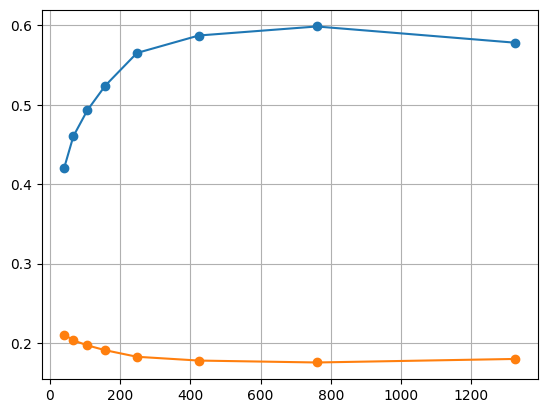

Power Transformer
RVE: 0.6016933758858438
RMSE: 0.17491042791103628


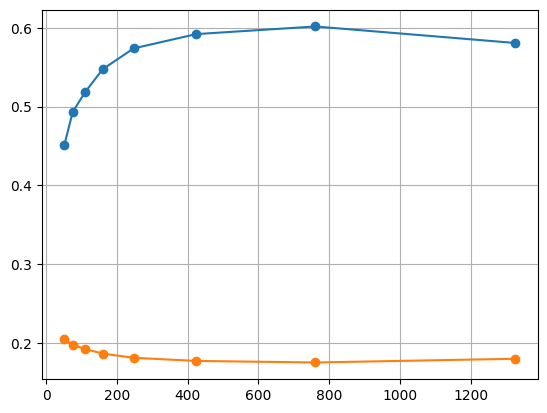

Quality normal
RVE: 0.6267045609981965
RMSE: 0.1691586004513472


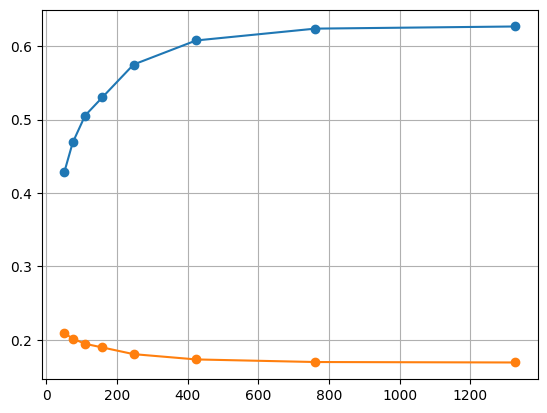

Quality Uniform
RVE: 0.6333314254774514
RMSE: 0.16769533014701607


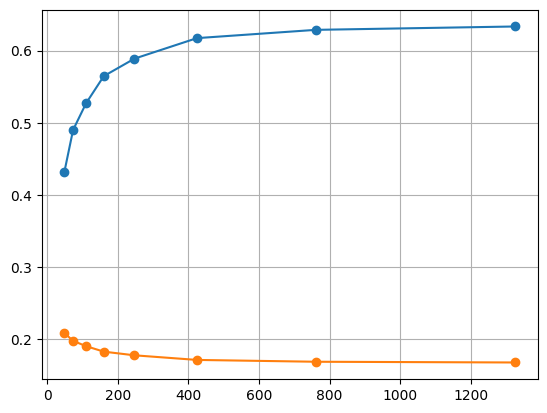

Normalizer
RVE: 0.6061182423272069
RMSE: 0.1743498650697077


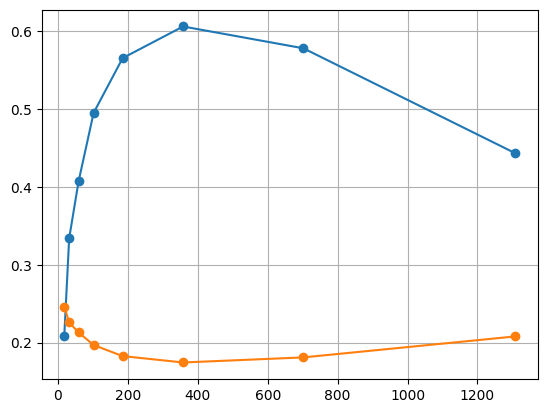

In [82]:
threshold = np.arange(0.02, 0.16, 0.02)
print(f"Min correlation value {threshold}")
KNN_mdl = KNeighborsRegressor(n_jobs=6)
test_scalers("Standard", threshold, KNN_mdl, v_scaled, X_train_scaled)

KNN_mdl = KNeighborsRegressor(n_jobs=6)
test_scalers("Power Transformer", threshold, KNN_mdl, v_scaled_power_t, X_train_power_t)

KNN_mdl = KNeighborsRegressor(n_jobs=6)
test_scalers("Quality normal", threshold, KNN_mdl, v_scaled_Quality_normal_t, X_train_normal_transform)

KNN_mdl = KNeighborsRegressor(n_jobs=6)
test_scalers("Quality Uniform", threshold, KNN_mdl, v_scaled_Quality_uniform_t, X_train_uniform_transform)

KNN_mdl = KNeighborsRegressor(n_jobs=6)
test_scalers("Normalizer", threshold, KNN_mdl, v_scaled_normalizer_t, X_train_normalizer_t)



Min correlation value [0.05 0.07 0.09 0.11 0.13 0.15]
Standard
RVE: 0.618692426722816
RMSE: 0.17086042366553167


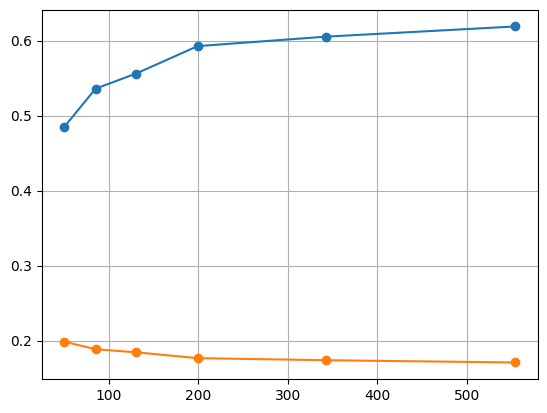

Power Transformer
RVE: 0.6187198152051453
RMSE: 0.17085419291127604


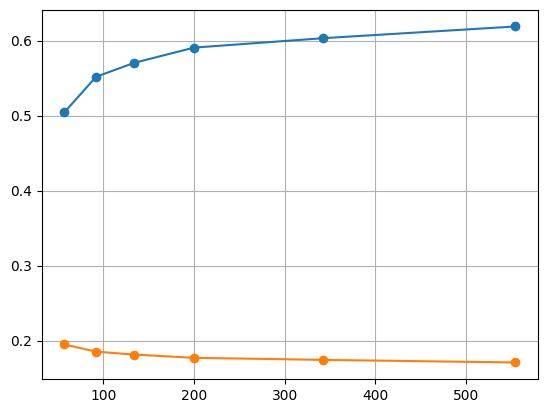

Quality normal
RVE: 0.6178008468711365
RMSE: 0.17105968555059867


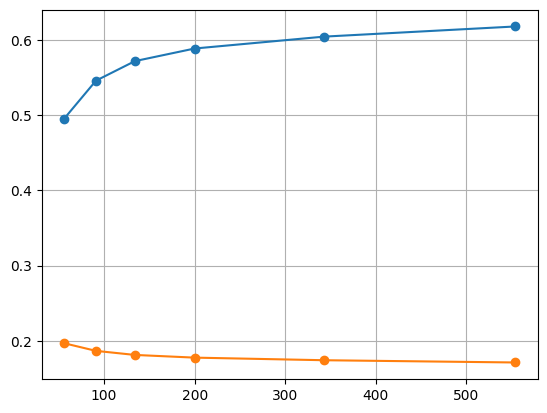

Quality Uniform
RVE: 0.6178718071865461
RMSE: 0.17104571114900952


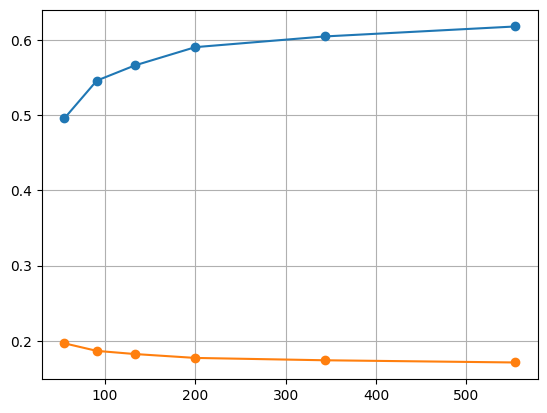

Normalizer
RVE: 0.6104253946232119
RMSE: 0.17270860584802628


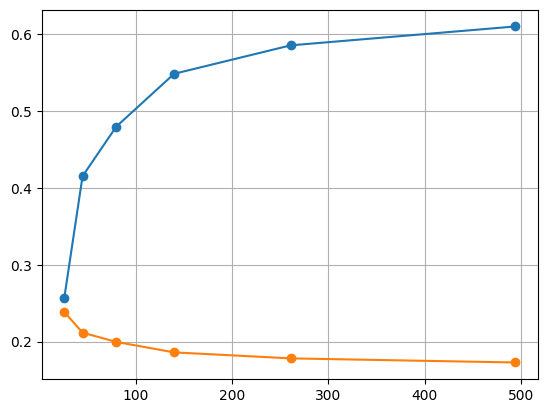

In [83]:
threshold = np.arange(0.05, 0.16, 0.02)
print(f"Min correlation value {threshold}")
RFR_mdl = RandomForestRegressor(n_estimators=50, random_state=0, n_jobs=8)
test_scalers("Standard", threshold, RFR_mdl, v_scaled, X_train_scaled)

RFR_mdl = RandomForestRegressor(n_estimators=50, random_state=0, n_jobs=8)
test_scalers("Power Transformer", threshold, RFR_mdl, v_scaled_power_t, X_train_power_t)

RFR_mdl = RandomForestRegressor(n_estimators=50, random_state=0, n_jobs=8)
test_scalers("Quality normal", threshold, RFR_mdl, v_scaled_Quality_normal_t, X_train_normal_transform)

RFR_mdl = RandomForestRegressor(n_estimators=50, random_state=0, n_jobs=8)
test_scalers("Quality Uniform", threshold, RFR_mdl, v_scaled_Quality_uniform_t, X_train_uniform_transform)

RFR_mdl = RandomForestRegressor(n_estimators=50, random_state=0, n_jobs=8)
test_scalers("Normalizer", threshold, RFR_mdl, v_scaled_normalizer_t, X_train_normalizer_t)

Min correlation value [0.05 0.07 0.09 0.11 0.13 0.15]
Standard


RVE: 0.6249999151297929
RMSE: 0.16947272359668025


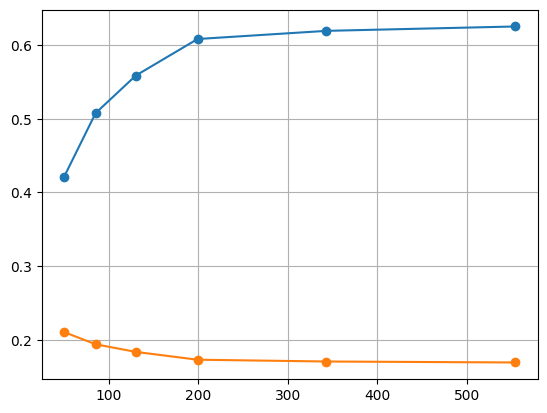

Power Transformer
RVE: 0.6286145033650289
RMSE: 0.168659669390757


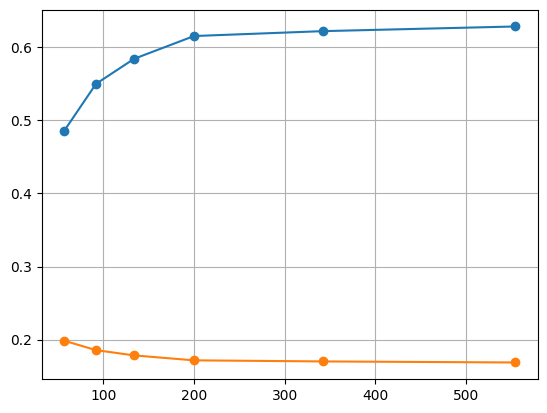

Quality normal
RVE: 0.6456377378474829
RMSE: 0.16471546999978728


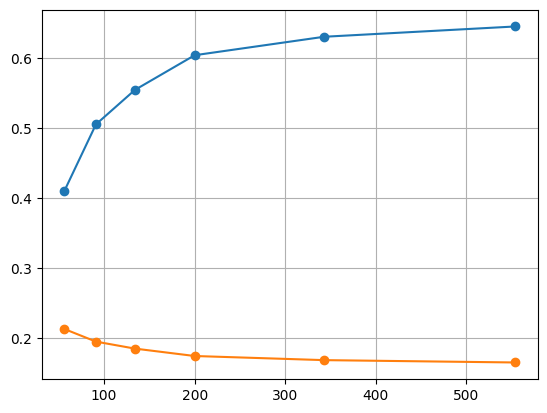

Quality Uniform
RVE: 0.6509885347162236
RMSE: 0.16347304985062877


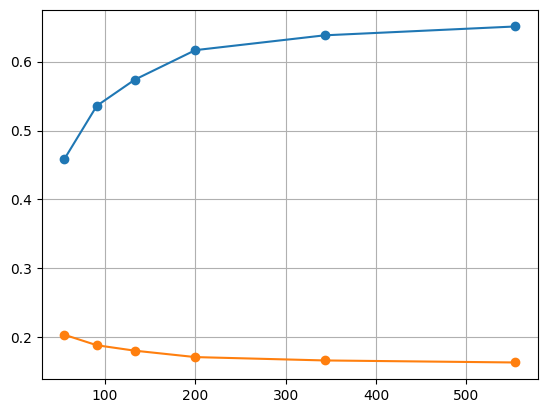

Normalizer
RVE: 0.5455997204953016
RMSE: 0.18649973530620764


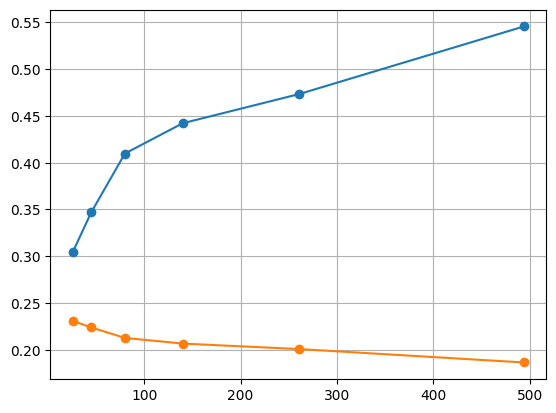

In [84]:
threshold = np.arange(0.05, 0.16, 0.02)
print(f"Min correlation value {threshold}")
mdl = SVR()
test_scalers("Standard", threshold, mdl, v_scaled, X_train_scaled)

mdl = SVR()
test_scalers("Power Transformer", threshold, mdl, v_scaled_power_t, X_train_power_t)

mdl = SVR()
test_scalers("Quality normal", threshold, mdl, v_scaled_Quality_normal_t, X_train_normal_transform)

mdl = SVR()
test_scalers("Quality Uniform", threshold, mdl, v_scaled_Quality_uniform_t, X_train_uniform_transform)

mdl = SVR()
test_scalers("Normalizer", threshold, mdl, v_scaled_normalizer_t, X_train_normalizer_t)

In [91]:
mlp = MLPRegressor()

# Define hyperparameters to search over
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 50, 25), (100,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(mlp, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Train the model with the best parameters on the entire training set
best_mlp = MLPRegressor(**best_params)
best_mlp.fit(X_train, y_train)

# Evaluate the model on the test set
# test_score = best_mlp.score(X_, y_test)
test_score = nfold_valid(X_train_scaled, y_train, best_mlp)

print("Best Parameters:", best_params)
print("Test Score:", test_score)

 The RVE is:  0.37042421524572366
 The rmse is:  0.22304813096638368
 The Correlation Score is: 0.6689 (p-value=0.000000e+00)

 The Maximum Error is:  1.0006593562757762
 The Mean Absolute Error is: 0.16905644174628826 

Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 25)}
Test Score: None


Min correlation value [0.05 0.07 0.09 0.11 0.13 0.15]
Standard
RVE: 0.47273978058303345
RMSE: 0.20087889857750532


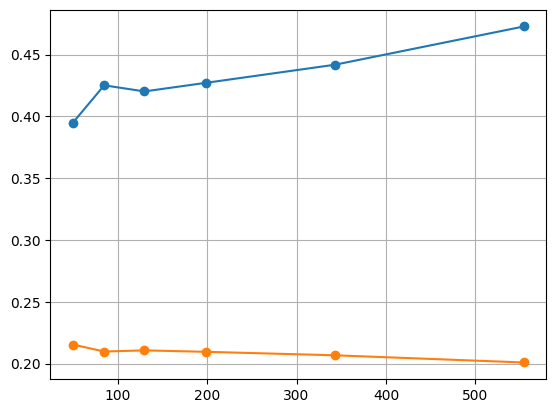

Power Transformer
RVE: 0.4578911500152776
RMSE: 0.2038708078371814


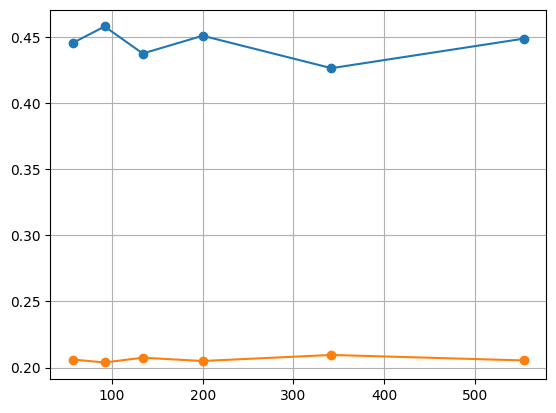

Quality normal
RVE: 0.48452383385645537
RMSE: 0.19867088896181773


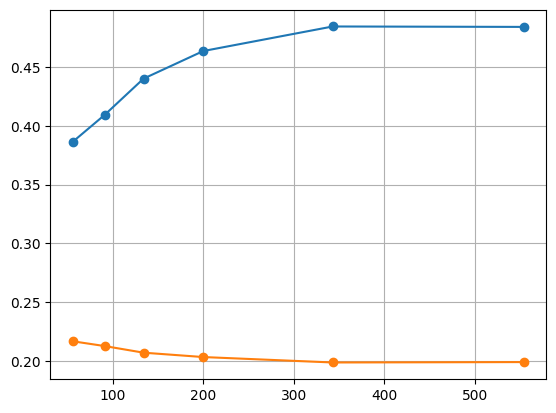

Quality Uniform
RVE: 0.5244942663964702
RMSE: 0.19079124689125013


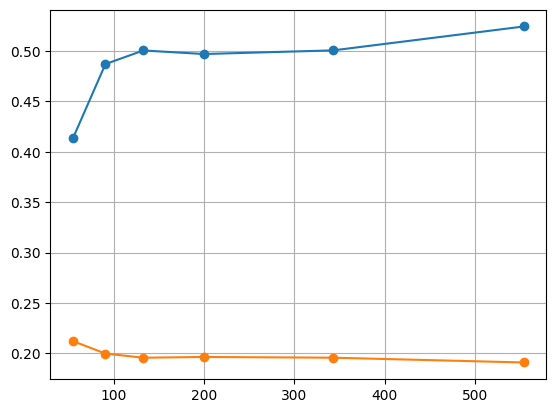

Normalizer
RVE: 0.47725230201217606
RMSE: 0.20063445526584361


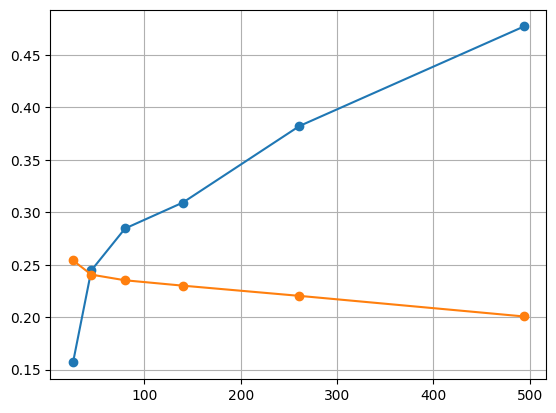

In [92]:
#%%script --no-raise-error
threshold = np.arange(0.05, 0.16, 0.02)
print(f"Min correlation value {threshold}")
mdl = MLPRegressor(solver='adam', max_iter=1000, alpha=0.01, activation="tanh", hidden_layer_sizes=[100, 50, 25])
test_scalers("Standard", threshold, mdl, v_scaled, X_train_scaled)

mdl = MLPRegressor(solver='adam', max_iter=1000, alpha=0.01, activation="tanh", hidden_layer_sizes=[100, 50, 25])
test_scalers("Power Transformer", threshold, mdl, v_scaled_power_t, X_train_power_t)

mdl = MLPRegressor(solver='adam', max_iter=1000, alpha=0.01, activation="tanh", hidden_layer_sizes=[100, 50, 25])
test_scalers("Quality normal", threshold, mdl, v_scaled_Quality_normal_t, X_train_normal_transform)

mdl = MLPRegressor(solver='adam', max_iter=1000, alpha=0.01, activation="tanh", hidden_layer_sizes=[100, 50, 25])
test_scalers("Quality Uniform", threshold, mdl, v_scaled_Quality_uniform_t, X_train_uniform_transform)

mdl = MLPRegressor(solver='adam', max_iter=1000, alpha=0.01, activation="tanh", hidden_layer_sizes=[100, 50, 25])
test_scalers("Normalizer", threshold, mdl, v_scaled_normalizer_t, X_train_normalizer_t)

In [86]:
#%%script false --no-raise-error
threshold = np.arange(0.05, 0.16, 0.02)
print(threshold)

for i in threshold:
    features_to_remove = features_to_remove_with_threshold(v_scaled, i)
    X_train_cut= np.delete(X_train_scaled, features_to_remove, 1)

    print(f"N-fold cross validation of X_train for {X_train_cut.shape[1]}")
    print("Random Forest")
    RFR_mdl = RandomForestRegressor(n_estimators=10, random_state=0, min_samples_leaf=3, max_depth = 8, n_jobs=6)
    nfold_valid(X_train_cut, y_train, RFR_mdl)

    print("Linear Regressor")
    LR_mdl = LinearRegression(n_jobs=6)
    nfold_valid(X_train_cut, y_train, LR_mdl)  

    print("Decision Tree")
    DTR_mdl = DecisionTreeRegressor(max_depth=5)
    nfold_valid(X_train_cut, y_train, DTR_mdl)

    print("KNN")
    KNN_mdl = KNeighborsRegressor(n_jobs=6)
    nfold_valid(X_train_cut, y_train, KNN_mdl)

    print("SVR")
    SVR_mdl = SVR()
    nfold_valid(X_train_cut, y_train, SVR_mdl)

    # print("MLP")
    # MLP_mdl = MLPRegressor()
    # nfold_valid(X_train_cut, y_train, MLP_mdl)

Couldn't find program: 'false'


### Selecting features by droping the features with correlation and by selection process

In [87]:
def featureSelect(x_train, n_features, t):
    rfr=RandomForestRegressor(random_state=0, n_jobs=6)
    rfr.fit(x_train, y_train)

    
    sel = SelectFromModel(estimator=rfr, threshold= t) #Change the threshold! See what happens!
    sel.fit(x_train, y_train)
    
    
    features=sel.get_support()
    Features_selected =np.arange(n_features)[features]
    print("The features selected are columns: ", Features_selected,".\n Number of features:", len(Features_selected))
    
    X_train_rffs=sel.transform(x_train)
    return X_train_rffs

In [88]:
#%%script false --no-raise-error

threshold = np.arange(0.05, 0.16, 0.02)

for i in threshold:
    features_to_remove = features_to_remove_with_threshold(v_scaled, i)
    X_train_cut= np.delete(X_train_scaled, features_to_remove, 1)
    X_train_rffs = featureSelect(X_train_cut, X_train_cut.shape[1], .003)

    print(f"\nN-fold cross validation of X_train for {X_train_cut.shape[1]} and {i} as threshold value")
    print("Random Forest")
    RFR_mdl = RandomForestRegressor(n_estimators=10, random_state=0, min_samples_leaf=3, max_depth = 8, n_jobs=6)
    nfold_valid(X_train_rffs, y_train, RFR_mdl)

    print("Linear Regressor")
    LR_mdl = LinearRegression(n_jobs=6)
    nfold_valid(X_train_rffs, y_train, LR_mdl)  

    print("Decision Tree")
    DTR_mdl = DecisionTreeRegressor(max_depth=5)
    nfold_valid(X_train_rffs, y_train, DTR_mdl)

    print("KNN")
    KNN_mdl = KNeighborsRegressor(n_jobs=6)
    nfold_valid(X_train_rffs, y_train, KNN_mdl)
    
    print("SVR")
    SVR_mdl = SVR()
    nfold_valid(X_train_rffs, y_train, SVR_mdl)

The features selected are columns:  [  0   1   3   4   5   6   8   9  10  11  16  20  21  22  23  24  25  26
  27  28  29  30  31  32  33  34  35  36  37  38  39  49  62  89  99 103
 107 110 111 128 142 200 231 235 238 245 262 274 279 290 316 342 379 396
 405 426 439 443 444 453 481 494 503 504] .
 Number of features: 64

N-fold cross validation of X_train for 554 and 0.05 as threshold value
Random Forest
 The RVE is:  0.4190877171738031
 The rmse is:  0.21084649591512317
 The Correlation Score is: 0.6505 (p-value=0.000000e+00)

 The Maximum Error is:  0.8891832564388891
 The Mean Absolute Error is: 0.16656893883675267 

Linear Regressor
 The RVE is:  0.3383090976151183
 The rmse is:  0.22502914326315188
 The Correlation Score is: 0.5818 (p-value=0.000000e+00)

 The Maximum Error is:  0.916567062074312
 The Mean Absolute Error is: 0.18079697421859914 

Decision Tree
 The RVE is:  0.28068137454207254
 The rmse is:  0.23462369941158245
 The Correlation Score is: 0.5310 (p-value=0.000000e